In [280]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [281]:
def approx(func, weight, basis):
    V = []
    n = len(basis)
    for i in range(n):
        Vi = [
            integrate.quad(lambda x: basis[i](x) * basis[j](x) * weight(x), -1, 1)[0]
            for j in range(n)
        ]
        V.append(Vi)
    b = np.array([
        integrate.quad(lambda x: basis[i](x) * func(x) * weight(x), -1, 1)[0]
        for i in range(n)
    ])
    return np.linalg.solve(V, b)

In [282]:
def approx_func(approx, basis, x):
    n = len(basis)
    res = 0
    for i in range(n):
        res += approx[i] *  basis[i](x)
    return res

In [283]:
funcs = np.array([np.exp, np.sin])
weights = np.array([lambda x: x**2, lambda x: np.cos(x)**2])
basiss = np.array([
    [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: x**3],
    [lambda x: 1, np.sin, np.cos, lambda x: np.sin(x)**2]
])

In [284]:
def f(func, name):
    fig, axs = plt.subplots(len(basiss)*2, len(weights), figsize=(21, 20), sharey=True)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for indw, weight in enumerate(weights):
        for indb, basis in enumerate(basiss):
            approxs = approx(func, weight, basis)
            x = np.linspace(-1, 1, 100)
            axs[indw * 2 + indb, 0].plot(
                x,
                func(x),
                alpha=0.5
            )
            axs[indw * 2 + indb, 0].plot(
                x,
                [approx_func(approxs, basis, xx) for xx in x],
                alpha=0.5
            )
            axs[indw * 2 + indb, 1].plot(
                x,
                abs(np.array([approx_func(approxs, basis, xx) for xx in x]) - func(x)),
                alpha=0.5
            )
            axs[indw * 2 + indb, 1].hlines(y=0, xmin=-1, xmax=1, color="r", linewidth=1)
            axs[indw * 2 + indb, 0].set_title(f'weight = {indw}, basis = {indb}')


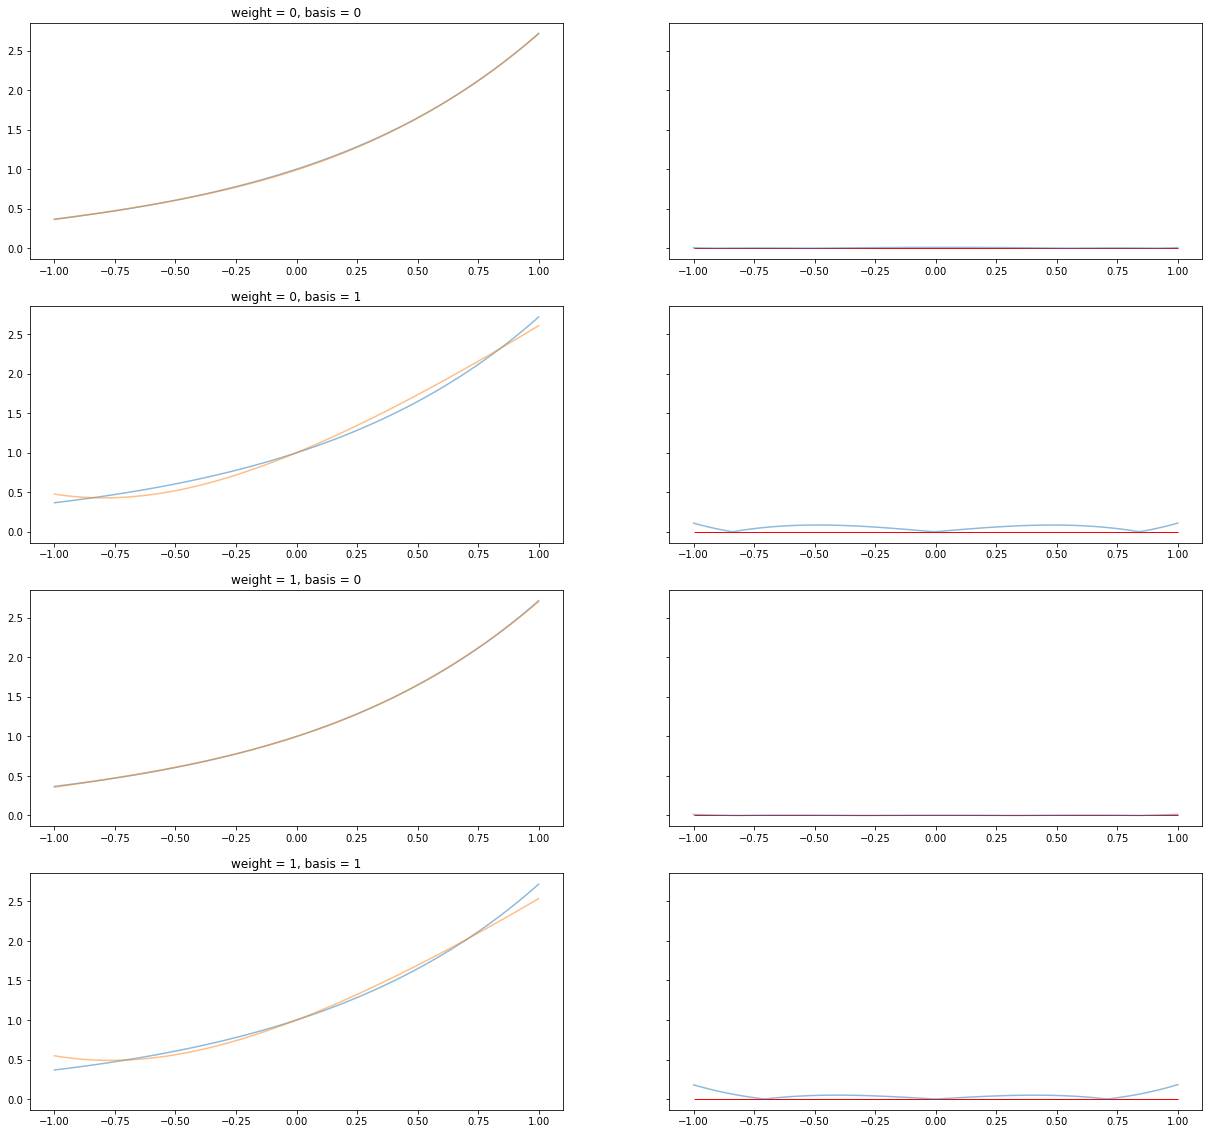

In [285]:
f(funcs[0], 'exp')

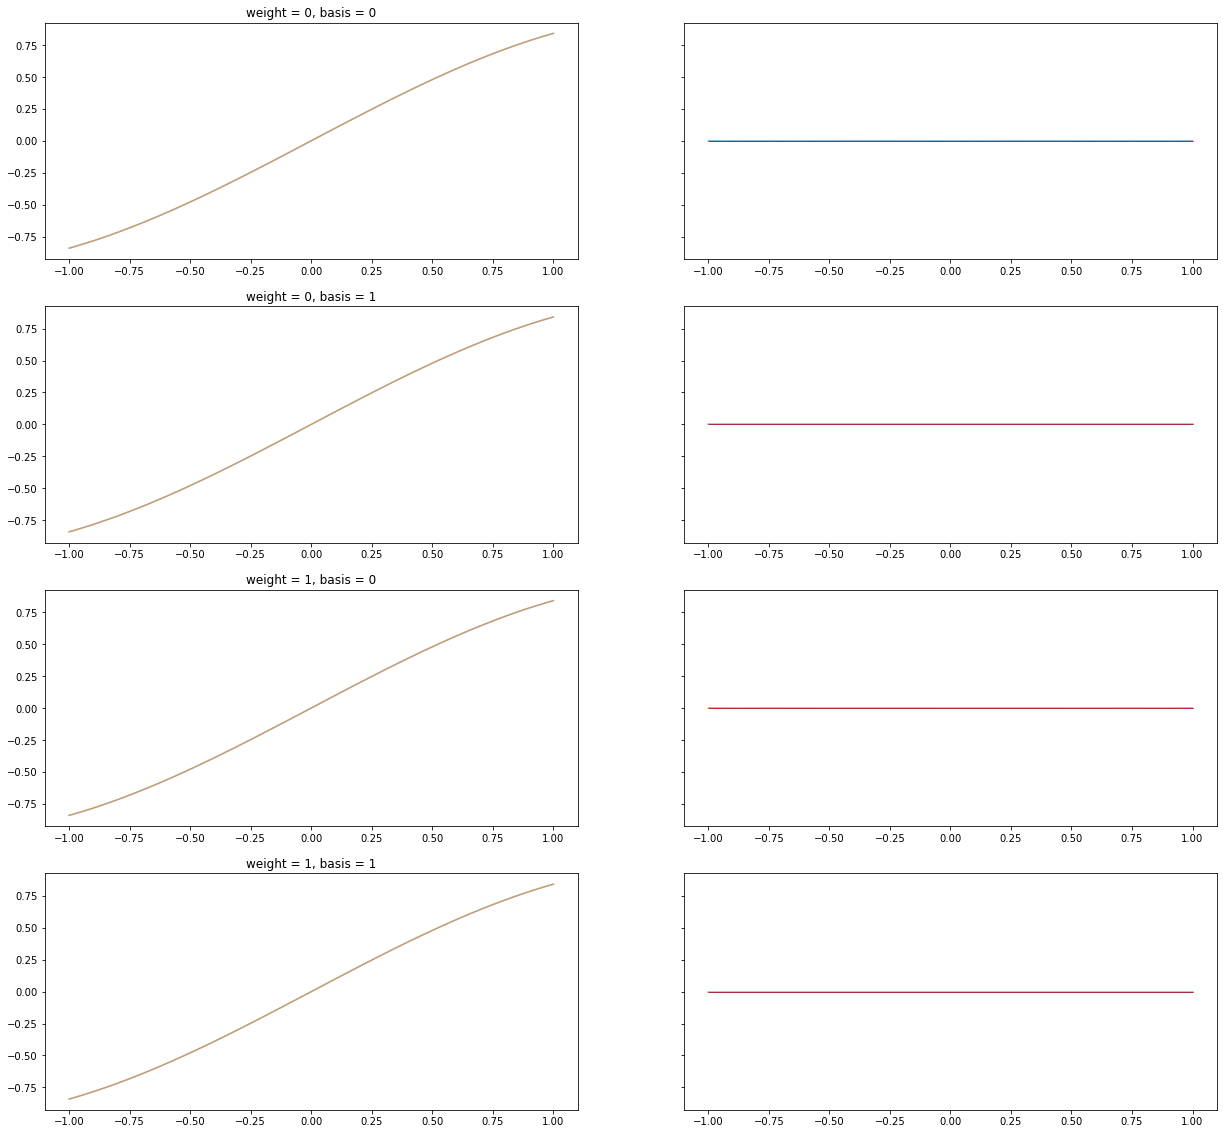

In [286]:
f(funcs[1], 'sin')